# Report
---
In this notebook, We see my implementation of the first project of the Deep Reinforcement Learning Nanodegree

## Implementation Details

### Summary
I implement a Deep Q-Network. Based on DRLND Project Sample.

### Details
The Deep Q-Network has following Neural Networks.

- First fully connected layer
  - inputs (states) -> $N_1$ 
- Second fully connected layer
  - $N_1$ -> $N_2$
- Third fully connected layer
  - $N_2$ -> outputs (actions)
  
### Hyperparameters

Agent hyperparameters are:

|parameter | value | description |
|----------|-------|-------------|
|buffer_size|100000| Number of experiences to hold in the replay memory |
|batch_size|64| Minibatch size used at each step |
|gamma | 0.95 | Discount applied to future rewards |
|tau | 0.0001 | Scaling parameter applied to spup update |
|LR | 0.00005 | Learning rate for Adam optimizer |
|update_interval | 4 | Number of agent steps between update oprations |
|hidden_layer| (128, 128) | Number of nodes for hidden layer ($N_1$, $N_2$)|

Training parameters are:

|parameter | value | description |
|----------|-------|-------------|
|episodes  | 2000 | Maximum number of training episodes |
|eps_start, eps_end, eps_decay | 1.0, 0.01, 0.995 | parameters of epslion-greedy policy |
| expect | 13 | Expected score to solved | 

## Execution


### Import and setting env

In [1]:
#import requirements

from unityagents import UnityEnvironment
import numpy as np

# My helpers
from scores import *
from dqn_agent import *
from model import *

cpu


In [2]:
# for mac
#env = UnityEnvironment(file_name="Banana.app")

# for linux
env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64")

# for windows
#env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Environement reset
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### Functions for single run or training

In [4]:
# function to run single episode & Train function

def runOnce(env, agent, eps ):
    score = 0
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations[0]
    done = False
    while not done:
        action = agent.act(state, eps )
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        agent.step(state, action, reward, next_state, done)
        score += reward
        state = next_state
    return score

def TrainAgent( env, agent, expect, prefix,  episodes=2000, window_size=100, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores = Scores(expect, window_size)
    success = False
    eps = eps_start
    for i_episode in range(1, episodes+1):
        score = runOnce(env, agent, eps )
        eps = max(eps_end, eps_decay*eps)
        if scores.AddScore(score) == True:
            agent.Save('model.pt')
            success = True
            break

    scores.FlushLog(prefix, True)
    return success

### Hyperparameters

In [5]:
# Hyperparameters
params = {
    'buffer_size': int(1e5),    # replay buffer size
    'batch_size': 64,           # minibatch size
    'gamma': 0.95,              # discount factor
    'tau': 1e-3,                # for soft update of target parameters
    'LR': 5e-4,                 # learning rate 
    'update_interval': 4,       # how often to update the network
    'hidden_layer': (128, 128)  # hidden layer info
}

### Train and result

[2021-03-07 23:45:25.180350] Episode 100	Average Score: 0.61
[2021-03-07 23:49:05.550974] Episode 200	Average Score: 3.49
[2021-03-07 23:52:49.345404] Episode 300	Average Score: 6.74
[2021-03-07 23:56:27.248126] Episode 400	Average Score: 10.25
[2021-03-07 23:59:58.779271] Episode 500	Average Score: 12.86
[2021-03-08 00:00:57.647759] Episode 527	Average Score: 13.03
[2021-03-08 00:00:57.647880] Environment solved in 427 episodes!	Average Score: 13.03

Min: -2.0
Max: 21.0
Count: 527
Avg: 7.11954459203036
Std: 5.505468850959418
Done




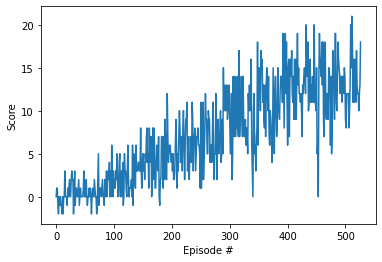

True

In [6]:
# Train it!
agent = Agent(state_size=state_size, action_size=action_size, seed=0, params = params ) 

TrainAgent(env, agent, 13, 'banana13_report')

### Train for more scores

[2021-03-08 00:04:35.840453] Episode 100	Average Score: 0.73
[2021-03-08 00:08:12.004080] Episode 200	Average Score: 2.13
[2021-03-08 00:11:52.896348] Episode 300	Average Score: 6.36
[2021-03-08 00:15:41.410539] Episode 400	Average Score: 9.87
[2021-03-08 00:19:25.760861] Episode 500	Average Score: 12.86
[2021-03-08 00:23:11.142064] Episode 600	Average Score: 13.04
[2021-03-08 00:26:58.211240] Episode 700	Average Score: 13.37
[2021-03-08 00:30:44.331509] Episode 800	Average Score: 14.33
[2021-03-08 00:34:30.630700] Episode 900	Average Score: 13.43
[2021-03-08 00:38:17.357691] Episode 1000	Average Score: 14.69
[2021-03-08 00:41:05.392193] Episode 1076	Average Score: 15.07
[2021-03-08 00:41:05.392385] Environment solved in 976 episodes!	Average Score: 15.07

Min: -2.0
Max: 24.0
Count: 1076
Avg: 10.449814126394052
Std: 6.046004699626401
Done




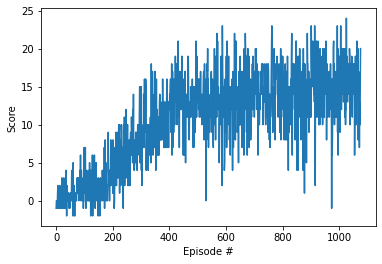

True

In [7]:
# Train for more score


agent = Agent(state_size=state_size, action_size=action_size, seed=0, params = params ) 

TrainAgent(env, agent, 15, 'banana_15_report')

### Model test

[2021-03-08 00:50:07.626295] Episode 10	Average Score: 13.20
[2021-03-08 00:50:37.583103] Episode 10	Average Score: 14.10
[2021-03-08 00:51:07.641554] Episode 10	Average Score: 15.60
[2021-03-08 00:51:37.778129] Episode 10	Average Score: 16.50
[2021-03-08 00:52:07.833578] Episode 10	Average Score: 17.60
[2021-03-08 00:52:37.826925] Episode 10	Average Score: 17.50
[2021-03-08 00:53:07.804986] Episode 10	Average Score: 17.70
[2021-03-08 00:53:37.732611] Episode 10	Average Score: 16.80
[2021-03-08 00:54:07.671744] Episode 10	Average Score: 15.80
[2021-03-08 00:54:37.646802] Episode 10	Average Score: 15.30
[2021-03-08 00:55:07.654911] Episode 10	Average Score: 15.10
[2021-03-08 00:55:37.605207] Episode 10	Average Score: 13.30
[2021-03-08 00:56:07.556782] Episode 10	Average Score: 12.40
[2021-03-08 01:34:35.410789] Episode 17	Average Score: 17.00
Min: 3.0
Max: 25.0
Count: 99
Avg: 14.98989898989899
Std: 4.330989924621241
Done




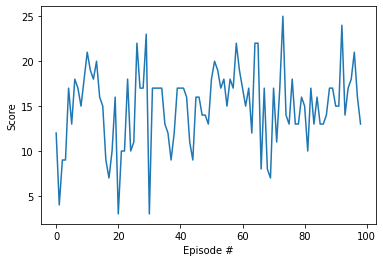

In [8]:
def runTestOnce(env, agent):
    score = 0
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    done = False
    while not done:
        action = agent.act(state, 0 )
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        agent.step(state, action, reward, next_state, done)
        score += reward
        state = next_state
    return score

agent.Load('model.pt')
scores = Scores(13, 10, False)
for i_episode in range(1, 100):
    score = runTestOnce(env, agent)
    scores.AddScore(score)

scores.FlushLog('test', True)

### Comments
My implementation of DQN may be not bad. But when expect score is 13, I  got some worse score case (under 5). 

I increase score to 15. It task some more epoch, and average score is increase. but still got very low score. I think it caused only state and action based learning. If agent get more information like optional project, I get more good result.

## Ideas for future work

- Implement DQN extensions likes Dueling networks, Prioritized Experience Relay, Raindow DQN or etc.
- Change NN Model
  - More hidden layers
  - More nodes in hidden layers.
- Learing from pixel information (Optional project)